In [1]:
# Necessary packages to import a Brick model 
import json

### The comparison of TTN data format between Link Lab and Water Sensor
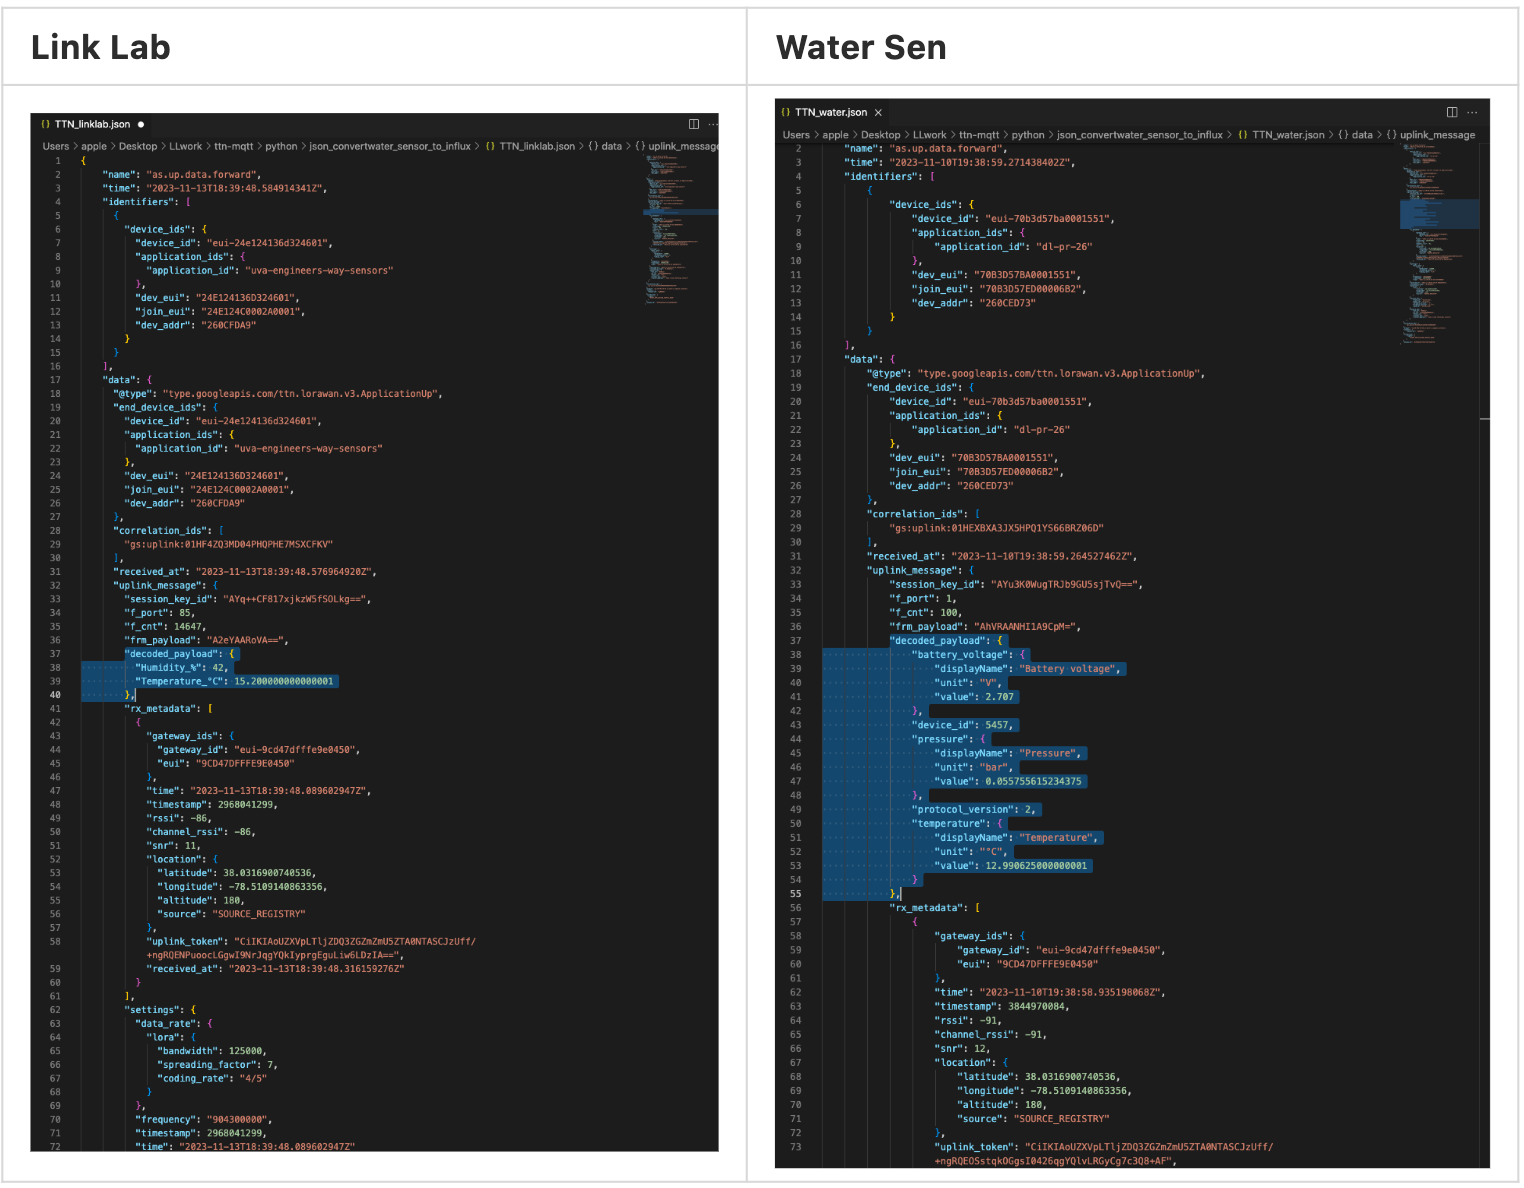

### The comparison of TTN data (sensor) names between Link Lab and Water Sensor

- [Reference: Standard of data names that should be used and stored in Link Lab influxDB database](https://infrastructure.linklab.virginia.edu/linklabcloud/index.html)

| Link Lab | Water Sesnor | Water Sesnor Unit |
| -------- | -------- | ------|
| Temperature_°C  | temperature  | "°C" |
| voltage_v | battery_voltage | "V" |
| pressure_hPa| pressure | "bar" |



In [64]:
# Let's assume to present MQTT for parsing message.payload

In [2]:
# Read and open a JSON file - TTN_water
with open('TTN_water.json', 'r') as p:
    the_data = json.load(p)
    message_payload = the_data["data"]
    
print(json.dumps(message_payload, indent = 2, sort_keys=True))

{
  "@type": "type.googleapis.com/ttn.lorawan.v3.ApplicationUp",
  "correlation_ids": [
    "gs:uplink:01HEXBXA3JX5HPQ1YS66BRZ06D"
  ],
  "end_device_ids": {
    "application_ids": {
      "application_id": "dl-pr-26"
    },
    "dev_addr": "260CED73",
    "dev_eui": "70B3D57BA0001551",
    "device_id": "eui-70b3d57ba0001551",
    "join_eui": "70B3D57ED00006B2"
  },
  "received_at": "2023-11-10T19:38:59.264527462Z",
  "uplink_message": {
    "consumed_airtime": "0.061696s",
    "decoded_payload": {
      "battery_voltage": {
        "displayName": "Battery voltage",
        "unit": "V",
        "value": 2.707
      },
      "device_id": 5457,
      "pressure": {
        "displayName": "Pressure",
        "unit": "bar",
        "value": 0.055755615234375
      },
      "protocol_version": 2,
      "temperature": {
        "displayName": "Temperature",
        "unit": "\u00b0C",
        "value": 12.990625000000001
      }
    },
    "f_cnt": 100,
    "f_port": 1,
    "frm_payload": "AhVR

In [11]:
# Convert TTN water sensor data to Link Lab TTN-influx format

In [3]:
# Step 1: Extract decoded_payload from water sensor payload
with open('TTN_water.json', 'r') as p:
    the_data = json.load(p)
    message_payload = the_data["data"]
    
    
water_decoded_payload = message_payload["uplink_message"].pop('decoded_payload')
print(json.dumps(water_decoded_payload, indent = 2, sort_keys=True))

{
  "battery_voltage": {
    "displayName": "Battery voltage",
    "unit": "V",
    "value": 2.707
  },
  "device_id": 5457,
  "pressure": {
    "displayName": "Pressure",
    "unit": "bar",
    "value": 0.055755615234375
  },
  "protocol_version": 2,
  "temperature": {
    "displayName": "Temperature",
    "unit": "\u00b0C",
    "value": 12.990625000000001
  }
}


In [4]:
# Step 2: Convert water sensor decoded_payload to Link Lab TTN-influx decoded_payload format
decoded_payload = {}
mapping = { 
    ## unit -> 'water': 'linklab_influx' ##
    'temperature': 'Temperature_°C',
    'battery_voltage': 'voltage_v',
    'pressure': 'pressure_hPa', # hPa value = bar value x 1000
    
            
}


# remove 'device_id' & 'protocol_version' here because it is only used for cloud.thethings.network
if 'device_id' in water_decoded_payload:
    water_decoded_payload.pop('device_id')
if 'protocol_version' in water_decoded_payload:
    water_decoded_payload.pop('protocol_version')

    
for measurement, nested in water_decoded_payload.items():
    decoded_payload[mapping[measurement]] = nested["value"]
    if measurement == "pressure":
        decoded_payload[mapping[measurement]] = nested["value"] * 1000

print(decoded_payload)

{'voltage_v': 2.707, 'pressure_hPa': 55.755615234375, 'Temperature_°C': 12.990625000000001}


In [5]:
# Step 3: Ingestion of decoded_payload into message_payload
message_payload["uplink_message"]["decoded_payload"]  = decoded_payload

print(json.dumps(message_payload, indent = 2, sort_keys=True))

{
  "@type": "type.googleapis.com/ttn.lorawan.v3.ApplicationUp",
  "correlation_ids": [
    "gs:uplink:01HEXBXA3JX5HPQ1YS66BRZ06D"
  ],
  "end_device_ids": {
    "application_ids": {
      "application_id": "dl-pr-26"
    },
    "dev_addr": "260CED73",
    "dev_eui": "70B3D57BA0001551",
    "device_id": "eui-70b3d57ba0001551",
    "join_eui": "70B3D57ED00006B2"
  },
  "received_at": "2023-11-10T19:38:59.264527462Z",
  "uplink_message": {
    "consumed_airtime": "0.061696s",
    "decoded_payload": {
      "Temperature_\u00b0C": 12.990625000000001,
      "pressure_hPa": 55.755615234375,
      "voltage_v": 2.707
    },
    "f_cnt": 100,
    "f_port": 1,
    "frm_payload": "AhVRAANHI1A9CpM=",
    "locations": {
      "user": {
        "altitude": 150,
        "latitude": 38.036852334987,
        "longitude": -78.5124491024889,
        "source": "SOURCE_REGISTRY"
      }
    },
    "network_ids": {
      "cluster_address": "nam1.cloud.thethings.network",
      "cluster_id": "nam1",
      "n

In [19]:


filename = 'TTN_water_adaption.json'          #use the file extension .json
# message_payload = json.dumps(message_payload, indent = 4, sort_keys=True)
with open(filename, 'w') as file_object:  #open the file in write mode
    
    json.dump(message_payload, file_object) 